In [19]:
import numpy as np
import networkx as nx

import tqdm
import random
import scipy
from itertools import combinations
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'scipy'

In [17]:
n = 1000
libs_per_post = 2
prob_new_lib = .05

G = nx.Graph()
G.add_weighted_edges_from([[0,1,1],[0,2,1],[1,2,1]])

latest_node = 2
degree_counter = [0,0,1,1,2,2]

for i in tqdm.tqdm(range(n)):
    n_libs = np.random.poisson(libs_per_post)
    to_add =[]
    for _ in range(n_libs):
        if random.random()<prob_new_lib:
            to_add.append(latest_node+1)
            latest_node+=1
        else:
            to_add.append(random.choice(degree_counter))
    degree_counter+=to_add
    for pair in combinations(set(to_add), 2):
        if G.has_edge(pair[0],pair[1]):
            G[pair[0]][pair[1]]['weight']+=1
        else:
            G.add_edge(pair[0],pair[1],weight=1)

100%|███████████████████████████████████| 1000/1000 [00:00<00:00, 172059.89it/s]


(-11.052364999999998,
 445.85936499999997,
 -13.383450000000002,
 348.27344999999997)

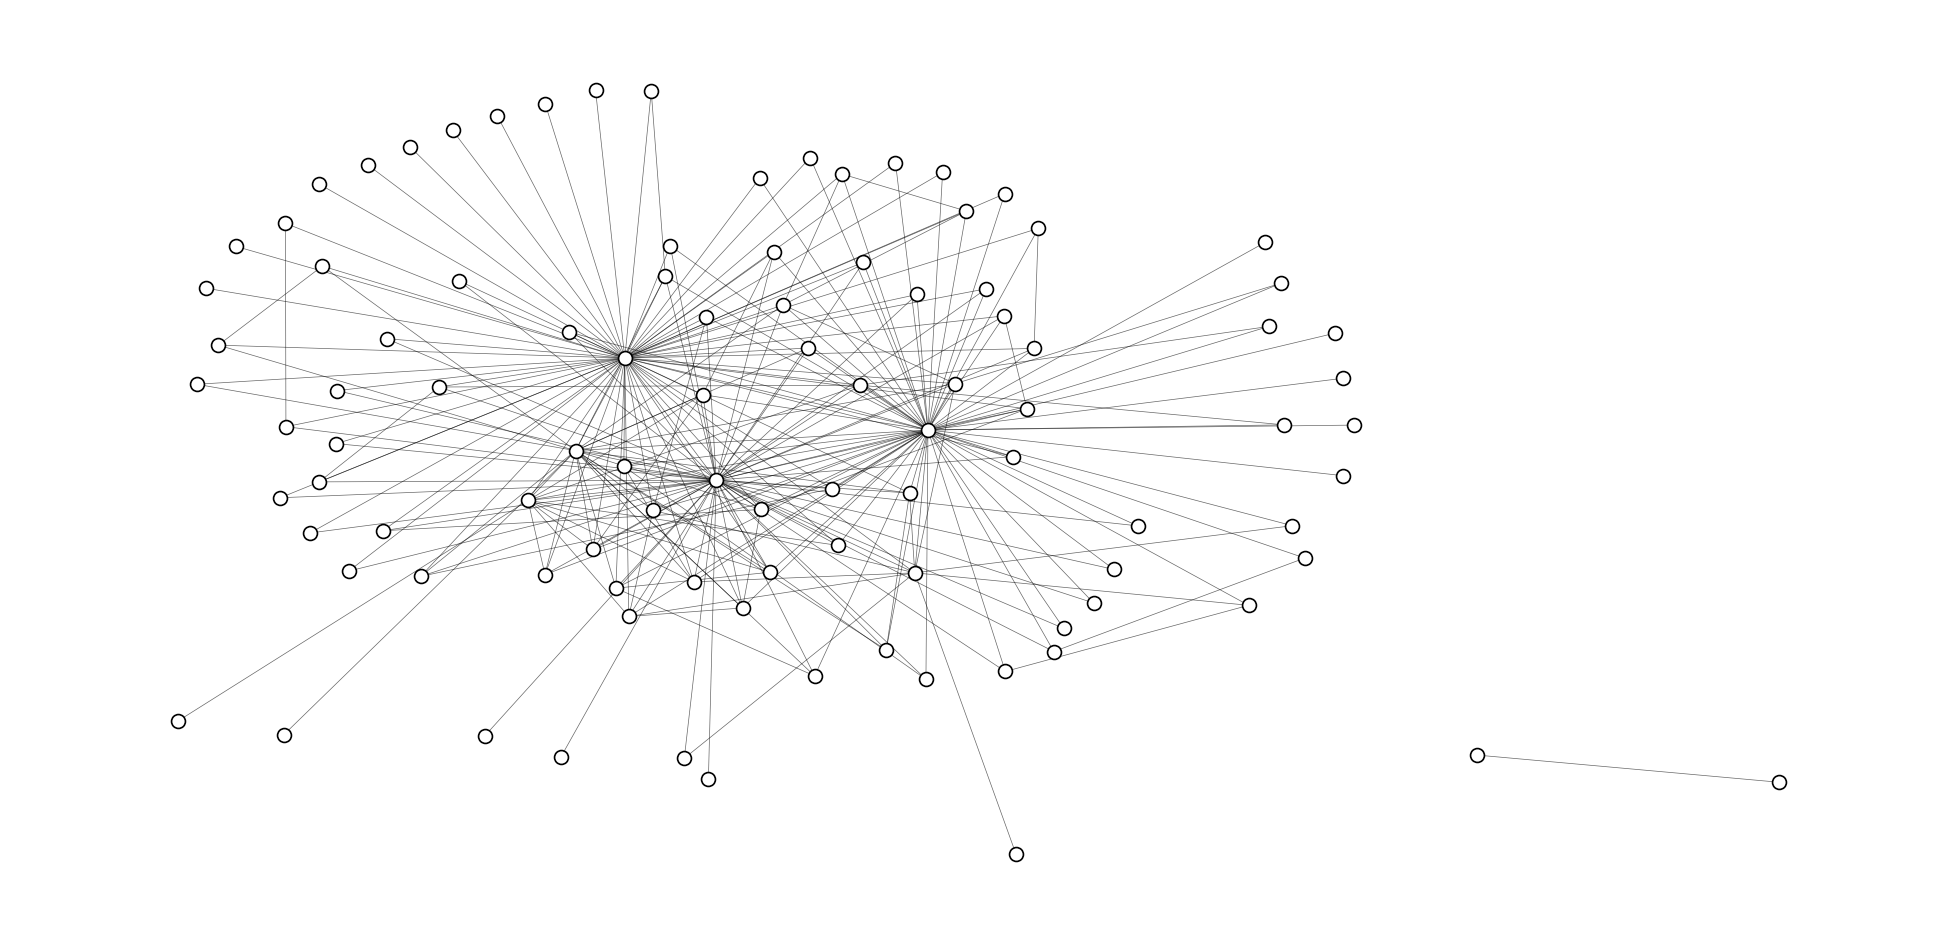

In [18]:
fig, ax = plt.subplots(1,1, figsize=(25,12))
pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='neato')
nx.draw_networkx_edges(G, pos=pos, edge_color='black', width=.5, alpha=.6, ax=ax)
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='white',
                       linewidths=1.2, edgecolors='black', ax=ax)
ax.axis('off')

In [15]:
np.random.poisson(2, 10)

array([2, 2, 6, 3, 0, 1, 5, 0, 2, 3])